<a href="https://colab.research.google.com/github/ParishaKB/SM/blob/master/lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nsepy
!pip install pmdarima

In [2]:
#Importing the libraries
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pmdarima import auto_arima 
import warnings 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [3]:
#Setting start and end dates and fetching the historical data
start = dt.datetime(2010,9,1)
end = dt.datetime(2015,12,31)
url ="https://raw.githubusercontent.com/ParishaKB/SM/master/INTC.csv"
stk_data= pd.read_csv(url)

#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=37.35 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=11433.475, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6769.584, Time=7.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=9437.788, Time=5.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=11441.209, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7330.204, Time=0.63 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6430.222, Time=18.38 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=50.11 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=20.81 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=11375.542, Time=8.95 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=6356.095, Time=24.13 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=6687.594, Time=8.45 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=92.83 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=26.16 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept

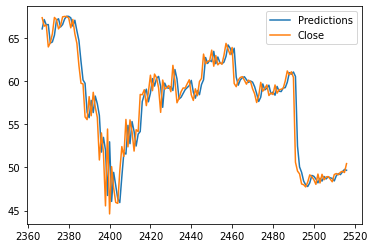

In [4]:
# Ignore harmless warnings 
warnings.filterwarnings("ignore") 

# Fit auto_arima function to Stock Market Data
stepwise_fit = auto_arima(data2['Close'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)         

  
# To print the summary 
stepwise_fit.summary() 

# Split data into train / test sets 
train = data2.iloc[:len(data2)-150] 
test = data2.iloc[len(data2)-150:]

# Fit a SARIMAX
model = SARIMAX(data2['Close'],  order = (0, 1, 1),  seasonal_order =(2, 1, 1, 12)) 


result = model.fit() 
result.summary() 


start = len(train) 
end = len(train) + len(test) - 1

  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, typ = 'levels').rename("Predictions") 

  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Close'].plot(legend = True)

In [19]:
predicted_stock_price

array([[50.69942 ],
       [50.748276],
       [50.773586],
       [50.758995],
       [50.695972],
       [50.576424],
       [50.40268 ],
       [50.180737],
       [49.929832],
       [49.66661 ],
       [49.41147 ],
       [49.189648],
       [49.025528],
       [48.933834],
       [48.914494],
       [48.95058 ],
       [49.02632 ],
       [49.118645],
       [49.20821 ],
       [49.27165 ],
       [49.29027 ],
       [49.249737],
       [49.130222],
       [48.93971 ],
       [48.699074],
       [48.4273  ],
       [48.14653 ],
       [47.882545],
       [47.663395],
       [47.511322],
       [47.425854],
       [47.395317],
       [47.40192 ],
       [47.427074],
       [47.452564],
       [47.48035 ],
       [47.524292],
       [47.608566],
       [47.749805],
       [47.943066],
       [48.157047],
       [48.362812],
       [48.52544 ],
       [48.611702],
       [48.607407],
       [48.507854],
       [48.32558 ],
       [48.095676],
       [47.84981 ],
       [47.60583 ],


Epoch 1/15
61/61 [==============================] - 1s 14ms/step - loss: 0.0121
Epoch 2/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0032
Epoch 3/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0031
Epoch 4/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0028
Epoch 5/15
61/61 [==============================] - 1s 14ms/step - loss: 0.0025
Epoch 6/15
61/61 [==============================] - 1s 14ms/step - loss: 0.0024
Epoch 7/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 8/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 9/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 10/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 11/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0023
Epoch 12/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 13/15
61/61 [==================

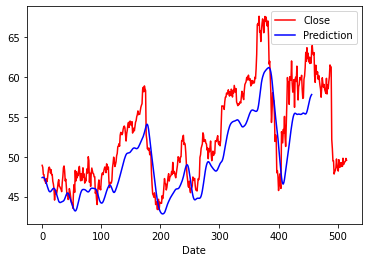

In [43]:
train_set = data2.iloc[0:2000,1:2]
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 2000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)


#Fetching the test data and preprocessing
testdataframe = data2.iloc[2001:,:]
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
Y_test = real_stock_price[59:517,:]
X_test = []
for i in range(60,517):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


#Visualizing the prediction
plt.figure()
plt.plot(real_stock_price, color = 'r', label = 'Close')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# RMSE for ARIMA model
err_ARIMA = rmse(test["Close"], predictions) 
print('RMSE with ARIMA', err_ARIMA)


#RMSE for LSTM Model
err_LSTM = rmse(Y_test, predicted_stock_price)
print('RMSE with LSTM', err_LSTM)

RMSE with ARIMA 2.0253682224936753
RMSE with LSTM [7.21025587]
